In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import os
os.chdir('D://DKIT//dissertation//Dataset_of_Tomato_Leaves//plantvillage//Preprocessed_data//64//no_bias_vector//')

In [3]:
#reading numpy array data
pixels = np.load('rgb_data.npy')
#reading csv file
data = pd.read_csv('rgb_data.csv')

In [4]:
features = pd.DataFrame(pixels)
features = features.values

In [5]:
features

array([[152, 146, 148, ..., 119, 113, 117],
       [171, 166, 163, ..., 141, 125, 125],
       [129, 132, 113, ...,  65,  51,  66],
       ...,
       [190, 186, 187, ..., 110,  98, 102],
       [189, 183, 185, ..., 116, 101, 106],
       [152, 145, 152, ..., 138, 125, 134]], dtype=uint8)

In [6]:
target = data['disease']

In [7]:
cat = target.unique()

In [8]:
vals = list(range(0,10))

In [9]:
for i in range(0,10):
    target.replace(to_replace=cat[i],value = vals[i],inplace = True)

In [10]:
target

0       0
1       0
2       0
3       0
4       0
       ..
5694    9
5695    9
5696    9
5697    9
5698    9
Name: disease, Length: 5699, dtype: int64

In [11]:
target = target.values

In [12]:
target = target.reshape(5699,1 )

In [13]:
target

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=int64)

In [14]:
#splitting the data to test and train
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target, test_size=0.20, random_state=24)

In [15]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [16]:
xtrain = xtrain.reshape(xtrain.shape[0], 64, 64, 3)
xtest = xtest.reshape(xtest.shape[0], 64, 64, 3)

In [17]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [18]:
# normalizing the data to help with the training
xtrain /= 255
xtest /= 255

In [19]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
ytrain = np_utils.to_categorical(ytrain, n_classes)
ytest = np_utils.to_categorical(ytest, n_classes)

In [20]:
# building a linear stack of layers with the sequential model
bal_cnn_model = Sequential()

# convolutional layer 1
bal_cnn_model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(64, 64, 3)))

# convolutional layer 2
bal_cnn_model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
bal_cnn_model.add(MaxPool2D(pool_size=(2,2)))
bal_cnn_model.add(Dropout(0.25))
# convolutional layer 3
bal_cnn_model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
bal_cnn_model.add(MaxPool2D(pool_size=(2,2)))
bal_cnn_model.add(Dropout(0.25))

# flatten output of conv
bal_cnn_model.add(Flatten())

# hidden layer
bal_cnn_model.add(Dense(500, activation='relu'))
bal_cnn_model.add(Dropout(0.4))
bal_cnn_model.add(Dense(250, activation='relu'))
bal_cnn_model.add(Dropout(0.3))
# output layer
bal_cnn_model.add(Dense(10, activation='softmax'))

# compiling the sequential model
bal_cnn_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [21]:
bal_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 75)        33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 75)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 125)       84500     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 125)      0         
 2D)                                                    

In [22]:
# training the model for 10 epochs
test_run = bal_cnn_model.fit(xtrain, ytrain, epochs=5, validation_data=(xtest, ytest))

Epoch 1/5
143/143 [==============================] - 62s 428ms/step - loss: 2.1061 - accuracy: 0.2200 - val_loss: 1.6008 - val_accuracy: 0.4746
Epoch 2/5
143/143 [==============================] - 71s 499ms/step - loss: 1.3197 - accuracy: 0.5370 - val_loss: 1.1914 - val_accuracy: 0.6053
Epoch 3/5
143/143 [==============================] - 74s 517ms/step - loss: 1.0172 - accuracy: 0.6605 - val_loss: 0.8768 - val_accuracy: 0.7149
Epoch 4/5
143/143 [==============================] - 66s 463ms/step - loss: 0.7795 - accuracy: 0.7333 - val_loss: 0.7028 - val_accuracy: 0.7632
Epoch 5/5
143/143 [==============================] - 74s 519ms/step - loss: 0.6699 - accuracy: 0.7721 - val_loss: 0.5439 - val_accuracy: 0.8158


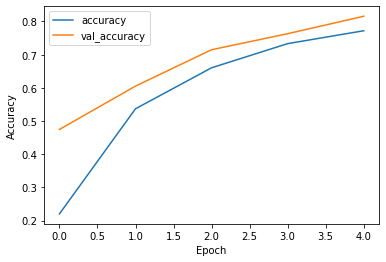

In [23]:
import matplotlib.pyplot as plt
plt.plot(test_run.history['accuracy'], label='accuracy')
plt.plot(test_run.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
score = bal_cnn_model.evaluate(xtest, ytest, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.5438998341560364
Test accuracy: 0.8157894611358643


In [25]:
pred = bal_cnn_model.predict(xtest) 
pred = np.argmax(pred, axis = 1)
label = np.argmax(ytest,axis = 1)

36/36 [==============================] - 4s 95ms/step


In [26]:
#importing classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(label, pred))
print(confusion_matrix(label, pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       115
           1       0.85      0.61      0.71       120
           2       0.76      0.98      0.86       125
           3       0.88      0.78      0.83       125
           4       0.91      0.80      0.85       127
           5       0.73      0.73      0.73       117
           6       0.85      0.70      0.77       115
           7       0.80      0.96      0.87        54
           8       0.88      0.91      0.90       114
           9       0.79      0.84      0.82       128

    accuracy                           0.82      1140
   macro avg       0.82      0.82      0.82      1140
weighted avg       0.82      0.82      0.81      1140

[[107   1   0   1   0   0   0   0   6   0]
 [ 21  73   2   6   3   5   4   0   1   5]
 [  0   0 122   0   0   2   0   0   0   1]
 [  2   6   7  98   2   7   0   0   1   2]
 [  0   2   2   4 101  13   0   2   0   3]
 [  3   2   6   2   5  85 